# Análisis y Modelado
### Análisis y Modelado de la data para el modelo de Machine Learning

In [341]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [342]:
rows = []
with open("steam_games.json") as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df = pd.DataFrame(rows)
df.head(3)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


Vamos a graficar los nulos en el Dataset

<Axes: >

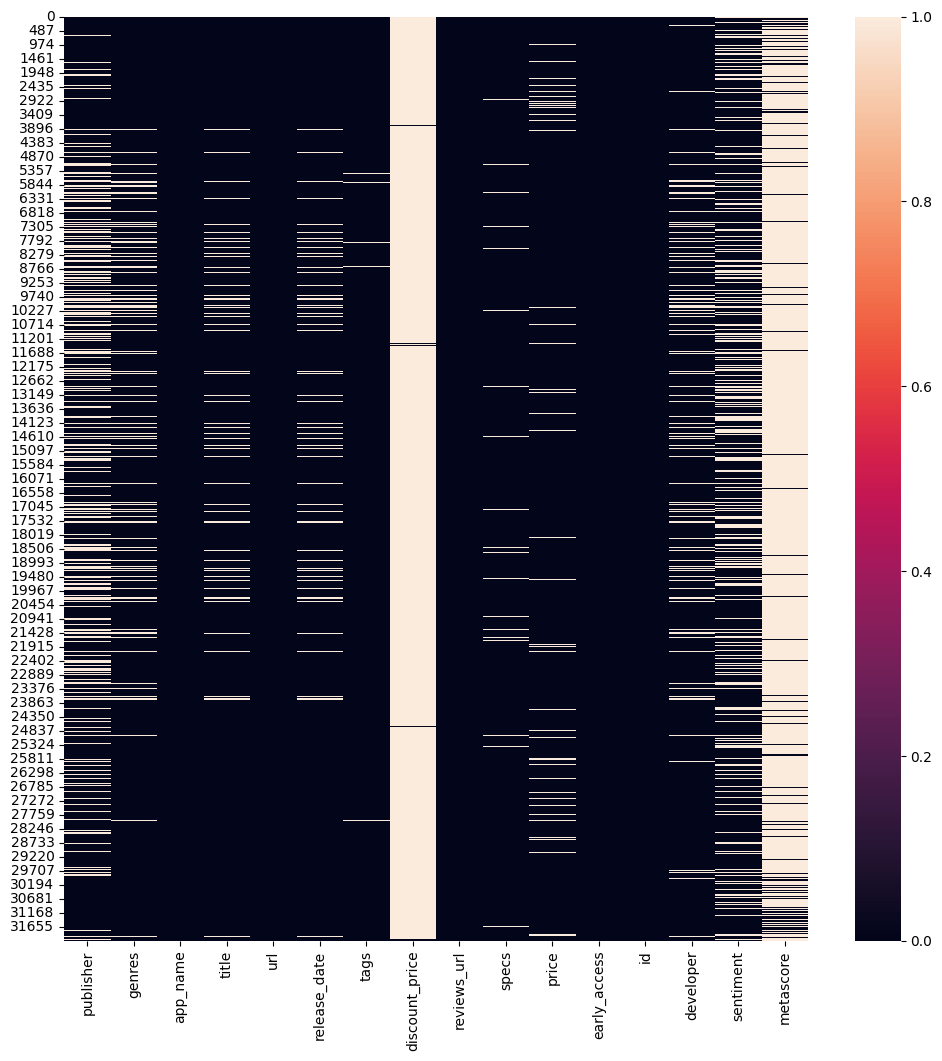

In [344]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.isna(), ax=ax)

---
### Eliminar
Eliminamos las columnas de urls y de id que no vamos a usar para el modelo de ML.

In [345]:
df = df.drop(['url', 'reviews_url', 'id'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   release_date    30068 non-null  object 
 5   tags            31972 non-null  object 
 6   discount_price  225 non-null    float64
 7   specs           31465 non-null  object 
 8   price           30758 non-null  object 
 9   early_access    32135 non-null  bool   
 10  developer       28836 non-null  object 
 11  sentiment       24953 non-null  object 
 12  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(11)
memory usage: 3.0+ MB


In [346]:
filas = df.shape[0]

df.drop_duplicates(subset=['publisher',
                           'app_name',
                           'title',
                           'release_date',
                           'discount_price',
                           'price',
                           'early_access',
                           'developer',
                           'sentiment',
                           'metascore'], inplace=True)

duplicados = filas - df.shape[0]

print(f"Filas: {filas}")
print(f"Filas duplicadas: {duplicados}")

Filas: 32135
Filas duplicadas: 2


In [347]:
df.columns.to_list()

['publisher',
 'genres',
 'app_name',
 'title',
 'release_date',
 'tags',
 'discount_price',
 'specs',
 'price',
 'early_access',
 'developer',
 'sentiment',
 'metascore']

---
## Variables
#### A continuación vamos a hacer un análisis detallado de cada variable.

---
### Price

Esta es una de las variables mas importantes, ya que es la variable que vamoa a tratar de predecir.

Así que la tenemos que tratar con cuidado.

In [348]:

df.head(3)

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Poolians.com,Mostly Positive,NaN


En la siguiente línea podemos observar la cantidad de juegos Free to play.

Ya que nuestro objetivo es calcular el precio de los juegos y no si son Free to play vamos a eliminar estos registros.

In [349]:
free = (df['price'].str.lower() == 'free to play').sum()
print(f"Juegos free to play: {free}")

Juegos free to play: 982


También podemos observar la cantidad de juegos sin precio.

Estos registros van a ser eliminados, ya que al ser la variable que queremos predecir, sería un grave error tratar de imputarla.

In [350]:
sin_precio = df['price'].isna().sum()

print(f"Juegos sin precio: {sin_precio}")

Juegos sin precio: 1377


In [351]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.head(3)

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",NaN,False,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",NaN,False,Poolians.com,Mostly Positive,NaN


In [352]:
df.dropna(subset=['price'], inplace=True)
df.head(3)

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,NaN,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.79,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN


---
### Descuento (discount_price)

Convertimos los valores de las columnas discount_price y discount a númericas para poder trabajarlas.

In [354]:
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

Vemos el promedio de los descuentos

In [355]:
print(f"Descuento promedio: {round((1 - ((df.discount_price / df.price).mean())), 2) * 100}%")

Descuento promedio: 38.0%


Observamos correlación entre el precio y el precio con descuento.

In [356]:
print(f"Coeficiente de Pearson: {round(df['discount_price'].corr(df['price']), 2)}")

Coeficiente de Pearson: 0.91


Vemos que logicamente tienen una relación muy alta, ya que el precio con descuento es siempre un porcentaje del valor de lista del juego, que promedia en un 38% de descuento.

Por lo que vamos a encarar la variable de forma binaria, "con descuento" "sin descuento". Y estudiar la correlación desde otro ángulo.

In [357]:
df_discount = df.copy()

In [358]:
df_discount['discount_price'].values[df_discount['discount_price'].values > 0] = 1
df_discount.head()

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",1.0,[Single-player],4.99,False,Kotoshiro,NaN,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",1.0,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.0,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,NaN
6,NaN,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,Poppermost Productions,NaN,NaN


In [359]:
df_discount['discount_price'] = df_discount['discount_price'].fillna(0)
df_discount.head()

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",1.0,[Single-player],4.99,False,Kotoshiro,NaN,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",1.0,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.0,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",0.0,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,NaN
6,NaN,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",0.0,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,Poppermost Productions,NaN,NaN


Cantidad de juegos de oferta vs lista

In [360]:
de_oferta = df_discount['discount_price'].sum()
de_lista = df_discount.shape[0] - de_oferta

print(f"Oferta: {de_oferta}")
print(f"Lista: {de_lista}")

Oferta: 160.0
Lista: 28686.0


Desde este ángulo podemos observar que la correlación es muy baja.

In [361]:
print(f"Coeficiente de Pearson: {round(df_discount['discount_price'].corr(df_discount['price']), 3)}")

Coeficiente de Pearson: -0.013


Tiene mucho sentido que la correlación sea muy baja, ya que la cantidad de juegos de oferta sea también baja.

Ya que usualmete hasta los mejores juegos en eventualmente se publican de oferta, y estas son rotativas.

Así que los juegos que están con descuento dependen del momento en el que se haya tomado el dataset.

Por estos motivos se decide eliminar la columna de descuentos, ya que perjudicaría el modelo.

In [362]:
df = df.drop(['discount_price'], axis=1)

---
## Sentiment

Esta es una variable muy interesante, ya que Steam hace una valoriación de los juegos basada en la cantidad de reviews y su puntaje.

Para explicar esto se encontró un hermoso cuadrito que lo explica mejor que mil palabras:

<p><img src="src/steam_ranking.png" height=600> <p>

In [363]:
df.groupby('sentiment')['sentiment'].count().sort_values(ascending=False)

sentiment
Mixed                      3522
Very Positive              3409
Positive                   2979
Mostly Positive            2392
1 user reviews             2357
2 user reviews             1640
3 user reviews             1148
4 user reviews              889
5 user reviews              783
Mostly Negative             710
6 user reviews              696
7 user reviews              563
8 user reviews              497
9 user reviews              454
Overwhelmingly Positive     273
Negative                    118
Very Negative                24
Overwhelmingly Negative       6
Name: sentiment, dtype: int64

Vemos que aparte de los 9 posibles rankings tenemos algunos que no alcanzan las 10 reviews, por lo que no llegan a obtener un ranking.

Vamos a tratar esta variable como "Categórica Ordinal"

Es posible que esta categoría tenga mucha importancia, ya que relaciona las cantidades de valoraciones con su puntaje.

Y por experiencia sabemos que un juego con mala valoración no necesariamente es económico (Anthem, Redfall, Gollum, Godfall, Mass Effect Andromeda, Fallout 76, etc...)

Los juegos con pocas valoraciones suelen ser de desarrolladores pequeños, por lo que sus precios saben ser menores.

Incluso algunos elementos de este Data Set son DLC, como podemos ver en la próxima línea.

In [364]:
(pd.DataFrame(df.groupby('app_name')['app_name'].count().sort_values(ascending=False))).tail(6)

,app_name
app_name,
FortressCraft Evolved: Skin Pack #1,1
FortressCraft Evolved: Frozen Factory Expansion,1
FortressCraft Evolved!,1
FortressCraft Evolved Dapper Indie Supporter's Pack,1
Fortix 2,1
🔴 Circles,1


Ya que los juegos que tienen al menos una review probablemente no sean DLC, los vamos a tratar con el menor valor ordinal.

In [365]:

orden = {"1 user reviews":1,
         "2 user reviews":1,
         "3 user reviews":1,
         "4 user reviews":1,
         "5 user reviews":1,
         "6 user reviews":1,
         "7 user reviews":1,
         "8 user reviews":1,
         "9 user reviews":1,
         "Overwhelmingly Negative":2,
         "Very Negative":3,
         "Negative":4,
         "Mostly Negative":5,
         "Mixed":6,
         "Mostly Positive":7,
         "Positive":8,
         "Very Positive":9,
         "Overwhelmingly Positive":10,
         }

df["sentiment"] = df["sentiment"].replace(orden)

In [366]:
df['sentiment'] = df['sentiment'].fillna(0)

In [367]:
df.groupby('sentiment')['sentiment'].count().sort_values(ascending=False)

sentiment
1.0     9027
0.0     6386
6.0     3522
9.0     3409
8.0     2979
7.0     2392
5.0      710
10.0     273
4.0      118
3.0       24
2.0        6
Name: sentiment, dtype: int64

La convertimos a numérica.

In [368]:
df['sentiment'] = pd.to_numeric(df['sentiment'])

---
## Metascore

Es una variable continua que expresa el puntaje de Metacritics, por lo que solo la vamos a transformar a numérica.

In [369]:
df['metascore'] = pd.to_numeric(df['metascore'],  errors='coerce')

El problema que encontramos con esta variable es que tiene demasiados nulos.

In [370]:
nulos = df['metascore'].isnull().sum()
print(f"Valores nulos: {nulos}")
print(f"Porcentaje de nulos: {round(((nulos / df.shape[0]) * 100), 2)}%")

Valores nulos: 26343
Porcentaje de nulos: 91.32%


Por suerte esta columna está directamente relacionada con sentiment, así que la vamos a eliminar.

In [371]:
df.drop('metascore', axis=1, inplace=True)

---
## Publisher y Developer

Usualmente los juegos publicados por empresas reconocidas, como Sony, EA, etc... Están desarrollados por equipos mas grandes, por lo que debería tener una influencia en su precio.

Asimismo pasa con desarrolladores reconocidos como From Software, Capcom, etc...

Así que vamos a agrupar estas dos variables según la cantidad de veces que se repitan los Publishers y los Developers.

Luego les asignaremos un valor para tratarlas como categóricas ordinales.

### Publisher

In [372]:
publishers = df.publisher.nunique()

print(f'Cantidad de publishers: {publishers}')

Cantidad de publishers: 7385


Generamos un data frame contando los publishers unicos.

In [373]:
df_publishers = pd.DataFrame(df.groupby('publisher')['publisher'].count().sort_values(ascending=False))
df_publishers

,publisher
publisher,
Ubisoft,373
Dovetail Games - Trains,360
Degica,276
Paradox Interactive,263
SEGA,224
...,...
Hooligans Entertainment,1
HoneyBeeSoftware,1
Homiebear Studio,1


Vemos como está distribuida la data

In [374]:
df_publishers.describe()

,publisher
count,7385.000000
mean,2.931754
std,11.880007
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,373.000000


Vamos a separar los Publishers an las siguientes ventanas:
- NaN     = 0
- 1       = 1
- 2 a 4   = 2
- 5 a 10  = 3
- 11 a 50 = 4
- mas de 50 = 5

In [375]:
mask_1 = df_publishers.publisher == 1
df_pub1 = df_publishers[mask_1]
lista_pub1 = df_pub1.index.to_list()

mask_2 = (df_publishers.publisher > 1) & (df_publishers.publisher <= 4) 
df_pub2 = df_publishers[mask_2]
lista_pub2 = df_pub2.index.to_list()

mask_3 = (df_publishers.publisher >= 5) & (df_publishers.publisher <= 10) 
df_pub3 = df_publishers[mask_3]
lista_pub3 = df_pub3.index.to_list()

mask_4 = (df_publishers.publisher > 10) & (df_publishers.publisher <= 50) 
df_pub4 = df_publishers[mask_4]
lista_pub4 = df_pub4.index.to_list()

mask_5 = df_publishers.publisher > 50 
df_pub5 = df_publishers[mask_5]
lista_pub5 = df_pub5.index.to_list()

Generamos una nueva columna para categorizar los datos.

In [376]:
df['publisher_cat'] = np.nan
df[['publisher_cat', 'publisher']]

,publisher_cat,publisher
0,NaN,Kotoshiro
3,NaN,彼岸领域
4,NaN,NaN
5,NaN,Trickjump Games Ltd
6,NaN,NaN
...,...,...
32130,NaN,Ghost_RUS Games
32131,NaN,Sacada
32132,NaN,Laush Studio
32133,NaN,SIXNAILS


In [377]:
def llenar_pub(valor):
    if valor in lista_pub1:
        return 1
    elif valor in lista_pub2:
        return 2
    elif valor in lista_pub3:
        return 3
    elif valor in lista_pub4:
        return 4
    elif valor in lista_pub5:
        return 5
    return 0

df['publisher_cat'] = df['publisher'].apply(llenar_pub)
df[['publisher_cat', 'publisher']]

,publisher_cat,publisher
0,1,Kotoshiro
3,1,彼岸领域
4,0,NaN
5,1,Trickjump Games Ltd
6,0,NaN
...,...,...
32130,4,Ghost_RUS Games
32131,4,Sacada
32132,3,Laush Studio
32133,2,SIXNAILS


In [378]:
# este paso es para usar los publishers para la prediccion.
dict_publishers = {'lista_pub1' : lista_pub1,
                   'lista_pub2' : lista_pub2,
                   'lista_pub3' : lista_pub3,
                   'lista_pub4' : lista_pub4,
                   'lista_pub5' : lista_pub5
                   }

# Generamos un pickle con los publishers.
with open('dict_publishers.pkl', 'wb') as dict_pub:
    pickle.dump(dict_publishers, dict_pub)

### Developer

In [379]:
developers = df.developer.nunique()

print(f'Cantidad de publishers: {developers}')

Cantidad de publishers: 10066


Generamos un data frame contando los publishers unicos.

In [380]:
df_developers = pd.DataFrame(df.groupby('developer')['developer'].count().sort_values(ascending=False))
df_developers

,developer
developer,
Ubisoft - San Francisco,1258
"SmiteWorks USA, LLC",808
Dovetail Games,252
"KOEI TECMO GAMES CO., LTD.",205
Paradox Development Studio,150
...,...
"ILIKESCIFI Games,Clement Willay Games",1
ILIKESCIFI Games,1
"IKI STUDIOS, LLC",1


Vemos como está distribuida la data

In [381]:
df_developers.describe()

,developer
count,10066.000000
mean,2.588416
std,16.022487
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1258.000000


Vamos a separar los Developers an las siguientes ventanas:
- NaN     = 0
- 1       = 1
- 2 a 4   = 2
- 5 a 10  = 3
- 11 a 50 = 4
- mas de 50 = 5

In [382]:
mask_1 = df_developers.developer == 1
df_dev1 = df_developers[mask_1]
lista_dev1 = df_dev1.index.to_list()

mask_2 = (df_developers.developer > 1) & (df_developers.developer <= 4) 
df_dev2 = df_developers[mask_2]
lista_dev2 = df_dev2.index.to_list()

mask_3 = (df_developers.developer >= 5) & (df_developers.developer <= 10) 
df_dev3 = df_developers[mask_3]
lista_dev3 = df_dev3.index.to_list()

mask_4 = (df_developers.developer > 10) & (df_developers.developer <= 50) 
df_dev4 = df_developers[mask_4]
lista_dev4 = df_dev4.index.to_list()

mask_5 = df_developers.developer > 50 
df_dev5 = df_developers[mask_5]
lista_dev5 = df_dev5.index.to_list()

Generamos una nueva columna para categorizar los datos.

In [383]:
df['developer_cat'] = np.nan
df[['developer_cat', 'developer']]

,developer_cat,developer
0,NaN,Kotoshiro
3,NaN,彼岸领域
4,NaN,NaN
5,NaN,Trickjump Games Ltd
6,NaN,Poppermost Productions
...,...,...
32130,NaN,"Nikita ""Ghost_RUS"""
32131,NaN,Sacada
32132,NaN,Laush Dmitriy Sergeevich
32133,NaN,"xropi,stev3ns"


In [384]:
def llenar_dev(valor):
    if valor in lista_dev1:
        return 1
    elif valor in lista_dev2:
        return 2
    elif valor in lista_dev3:
        return 3
    elif valor in lista_dev4:
        return 4
    elif valor in lista_dev5:
        return 5
    return 0

df['developer_cat'] = df['developer'].apply(llenar_dev)
df[['developer_cat', 'developer']]

,developer_cat,developer
0,1,Kotoshiro
3,1,彼岸领域
4,0,NaN
5,1,Trickjump Games Ltd
6,3,Poppermost Productions
...,...,...
32130,3,"Nikita ""Ghost_RUS"""
32131,4,Sacada
32132,3,Laush Dmitriy Sergeevich
32133,2,"xropi,stev3ns"


In [385]:
# este paso es para usar los publishers para la prediccion.
dict_developers = {'lista_dev1' : lista_dev1,
                   'lista_dev2' : lista_dev2,
                   'lista_dev3' : lista_dev3,
                   'lista_dev4' : lista_dev4,
                   'lista_dev5' : lista_dev5
                   }

# Generamos un pickle con los publishers.
with open('dict_developers.pkl', 'wb') as dict_dev:
    pickle.dump(dict_developers, dict_dev)

Finalmente eliminamos las columnas con los nombres literales.

In [386]:
df = df.drop(['publisher', 'developer'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28846 entries, 0 to 32134
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         26079 non-null  object 
 1   app_name       28845 non-null  object 
 2   title          27244 non-null  object 
 3   release_date   27240 non-null  object 
 4   tags           28719 non-null  object 
 5   specs          28233 non-null  object 
 6   price          28846 non-null  float64
 7   early_access   28846 non-null  bool   
 8   sentiment      28846 non-null  float64
 9   publisher_cat  28846 non-null  int64  
 10  developer_cat  28846 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 2.4+ MB


---
## Release Date

El año en que se lanza un juego posiblemente tenga una influencia en el precio, ya que universalmente han ido subiendo con los años.

También puede tener un efecto el mes, ya que hay meses en los que son mas comunes los lanzamientos o cerca de alguna fecha especial como navidad.

Por lo que vamos a crear columnas para los años y los meses.

En las fechas vamos a tratar de imputar algunos valores

Y luego convertirla a DateTime

In [387]:
df['release_date'] = df['release_date'].str.replace('Coming ', '')

df['release_date'] = df['release_date'].str.replace('End', 'Dec')

df['release_date'] = df['release_date'].str.replace('Q1', 'Feb')
df['release_date'] = df['release_date'].str.replace('Q2', 'May')
df['release_date'] = df['release_date'].str.replace('Q3', 'Aug')
df['release_date'] = df['release_date'].str.replace('Q4', 'Nov')

df['release_date'] = df['release_date'].str.replace('Early', 'Mar')
df['release_date'] = df['release_date'].str.replace('Late 2016 - Early 2017', 'Mar')
df['release_date'] = df['release_date'].str.replace('Late', 'Nov')

df['release_date'] = df['release_date'].str.replace('Spring', 'Apr')
df['release_date'] = df['release_date'].str.replace('Summer', 'Jul')
df['release_date'] = df['release_date'].str.replace('Autumn', 'Oct')
df['release_date'] = df['release_date'].str.replace('Winter', 'Jan')

df['date1'] = pd.to_datetime(df["release_date"], format="%b %Y", errors='coerce') # Feb 2017
df['date2'] = pd.to_datetime(df["release_date"], format="%B %Y", errors='coerce') # August 2017

df['release_date'] = pd.to_datetime(df["release_date"], errors='coerce')

In [388]:
df['release_date'] = df['release_date'].fillna(df['date1'])
df['release_date'] = df['release_date'].fillna(df['date2'])
df = df.drop(['date1', 'date2'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28846 entries, 0 to 32134
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   genres         26079 non-null  object        
 1   app_name       28845 non-null  object        
 2   title          27244 non-null  object        
 3   release_date   27236 non-null  datetime64[ns]
 4   tags           28719 non-null  object        
 5   specs          28233 non-null  object        
 6   price          28846 non-null  float64       
 7   early_access   28846 non-null  bool          
 8   sentiment      28846 non-null  float64       
 9   publisher_cat  28846 non-null  int64         
 10  developer_cat  28846 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 2.4+ MB


Podemos ver que nos quedaron solo 1610 datos nulos en la columna de fechas.

In [389]:
nulos = df.release_date.isna().sum()

print(f'Porcentaje de nulos: {round((nulos / filas * 100), 2)}%')

Porcentaje de nulos: 5.01%


Estos representan un 5,6% de las filas que tenemos, así que vamos a proceder a eliminar esos nulos.

In [390]:
df.dropna(inplace=True)
df.isna().sum().sort_values(ascending=False)

genres           0
app_name         0
title            0
release_date     0
tags             0
specs            0
price            0
early_access     0
sentiment        0
publisher_cat    0
developer_cat    0
dtype: int64

Vamos a dividir la fecha en una columna para el año y dummies para los doce meses.

In [391]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df[['release_date', 'year', 'month']].head(3)

,release_date,year,month
0,2018-01-04,2018,1
3,2017-12-07,2017,12
5,2018-01-04,2018,1


In [392]:
dummies = pd.get_dummies(df.month, prefix='month', prefix_sep='_', drop_first=True)
print(dummies.shape[1])

df = pd.concat([df, dummies], axis=1, join='inner')

df.drop(['release_date', 'month'], axis=1, inplace=True)

df.columns

11


Index(['genres', 'app_name', 'title', 'tags', 'specs', 'price', 'early_access',
       'sentiment', 'publisher_cat', 'developer_cat', 'year', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

---
## Genres, Tags y Specs

Estas tres variables son todas carácterísticas de los juegos, que están en un formato parecido.

Las podemos considerar como variables categóricas nominales.

Las vamos a separar y hacer dummies de cada uno de sus valores únicos.

In [393]:
df[['title','genres', 'tags', 'specs', 'price']].head()

,title,genres,tags,specs,price
0,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99
3,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],0.99
5,Battle Royale Trainer,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",3.99
6,SNOW - All Access Basic Pass,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",9.99
7,SNOW - All Access Pro Pass,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",18.99


Vamos a ver por que tenemos algunos registros que están descritos como free to play pero tienen precio.

In [394]:
df_exploded = df.explode('tags')

df_exploded['tags'] = df_exploded['tags'].str.lower()

df_exploded.head()

,genres,app_name,title,tags,specs,price,early_access,sentiment,publisher_cat,developer_cat,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,strategy,[Single-player],4.99,False,0.0,1,1,...,False,False,False,False,False,False,False,False,False,False
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,action,[Single-player],4.99,False,0.0,1,1,...,False,False,False,False,False,False,False,False,False,False
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,indie,[Single-player],4.99,False,0.0,1,1,...,False,False,False,False,False,False,False,False,False,False
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,casual,[Single-player],4.99,False,0.0,1,1,...,False,False,False,False,False,False,False,False,False,False
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,simulation,[Single-player],4.99,False,0.0,1,1,...,False,False,False,False,False,False,False,False,False,False


In [395]:
mask = df_exploded['tags'] == 'free to play'
df_exploded = df_exploded[mask]
print(f"Cantidad de registros: {df_exploded.shape[0]}\n")
df_exploded[['title', 'tags', 'price']].sample(15)

Cantidad de registros: 1095



,title,tags,price
28998,DRAKERZ-Confrontation : 20 virtual BOOSTERS,free to play,34.99
24157,Spec Ops Pack,free to play,9.99
22766,WildStar: Adventure Pack,free to play,19.99
1491,Star Conflict: Pirate Pack - Dead Man's Chest,free to play,79.99
22912,Астролорды: Исследователь,free to play,24.99
29859,Stronghold Kingdoms Starter Pack,free to play,19.99
15204,EVE Online: 12 Months Omega Time,free to play,131.40
15514,Crossout - The Inventor pack,free to play,69.99
7187,HEX: Herofall Bundle,free to play,14.99
6170,Spellweaver - Soldier Reverence Deck,free to play,4.99


Si nos fijamos en los title, vemos que estos son Packs o Passes.

In [396]:
paquetes = df['title'].str.contains('pack', case=False)
paquetes = paquetes.fillna(False)
df_paquetes = df[paquetes]
print(f"Cantidad de registros que son paquetes: {df_paquetes.shape[0]}\n")
df_paquetes.head(3)

Cantidad de registros que son paquetes: 3026



,genres,app_name,title,tags,specs,price,early_access,sentiment,publisher_cat,developer_cat,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
16,"[Free to Play, Indie, Simulation, Sports]",SNOW - Starter Pack,SNOW - Starter Pack,"[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",14.99,False,0.0,2,3,...,False,False,False,False,False,False,False,False,False,False
18,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,SNOW - Lifetime Pack,"[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",59.99,False,0.0,2,3,...,False,False,False,False,False,False,False,False,False,False
27,"[Action, Indie, Racing]",Carmageddon Max Pack,Carmageddon Max Pack,"[Racing, Action, Classic, Indie, Gore, 1990's,...","[Single-player, Multi-player, Steam Trading Ca...",9.99,False,9.0,2,3,...,False,False,False,True,False,False,False,False,False,False


In [397]:
pase = df['title'].str.contains('pass', case=False)
pase = pase.fillna(False)
df_pase = df[pase]
print(f"Cantidad de registros que son Pass: {df_pase.shape[0]}\n")
df_pase.sample(10)

Cantidad de registros que son Pass: 127



,genres,app_name,title,tags,specs,price,early_access,sentiment,publisher_cat,developer_cat,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
25064,"[Adventure, Indie, RPG, Strategy]",Legends of Eisenwald Season Pass,Legends of Eisenwald Season Pass,"[Strategy, Adventure, RPG, Indie]","[Single-player, Downloadable Content, Steam Ac...",14.99,False,1.0,2,2,...,False,False,False,False,False,False,False,False,True,False
18718,"[Indie, RPG, Strategy]",Fantasy Grounds - Compass Point 03 - The Folly...,Fantasy Grounds - Compass Point 03 - The Folly...,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...",5.99,False,0.0,0,5,...,True,False,False,False,False,False,False,False,False,False
2454,"[Action, RPG]",DARK SOULS™ II - Season Pass,DARK SOULS™ II - Season Pass,"[RPG, Dark Fantasy, Action, Difficult, Action ...","[Single-player, Multi-player, Co-op, Downloada...",24.99,False,9.0,1,3,...,False,False,False,False,True,False,False,False,False,False
31111,[Action],Saints Row: The Third Season Pass DLC Pack,Saints Row: The Third Season Pass DLC Pack,[Action],"[Single-player, Co-op, Downloadable Content, P...",4.99,False,0.0,5,4,...,False,False,False,False,False,False,False,False,True,False
15077,"[Action, Adventure, RPG]",Middle-earth™: Shadow of War™ Expansion Pass,Middle-earth™: Shadow of War™ Expansion Pass,"[Gambling, Violent, Action, Adventure, Gore, RPG]","[Single-player, Downloadable Content, Steam Ac...",39.99,False,6.0,0,3,...,False,False,False,False,False,False,False,True,False,False
5550,"[Action, Adventure, RPG]",Tom Clancy's The Division™ - Season Pass,Tom Clancy's The Division™ - Season Pass,"[Action, RPG, Adventure, Multiplayer]","[Single-player, Multi-player, Co-op, Downloada...",39.99,False,6.0,0,4,...,True,False,False,False,False,False,False,False,False,False
15873,"[Simulation, Sports]",Euro Fishing: Season Pass,Euro Fishing: Season Pass,"[Simulation, Sports]","[Single-player, Multi-player, Downloadable Con...",34.99,False,0.0,2,5,...,False,False,False,False,False,False,True,False,False,False
9124,[Action],Dead Rising 4 - Season Pass,Dead Rising 4 - Season Pass,"[Gore, Violent, Action]","[Single-player, Online Multi-Player, Downloada...",19.99,False,6.0,5,3,...,True,False,False,False,False,False,False,False,False,False
1238,[Simulation],Train Simulator: Donner Pass: Southern Pacific...,Train Simulator: Donner Pass: Southern Pacific...,"[Simulation, Trains, Family Friendly, TrackIR,...","[Single-player, Downloadable Content, Steam Ac...",19.99,False,6.0,5,5,...,False,False,False,False,False,False,False,False,False,True
20686,"[Action, Adventure]",Call of Duty®: Infinite Warfare - Season Pass,Call of Duty®: Infinite Warfare - Season Pass,"[Action, Adventure, FPS]","[Single-player, Online Multi-Player, Online Co...",49.99,False,6.0,5,5,...,False,False,False,False,False,False,False,False,True,False


Como vemos en los cuadros anteriores, hay aproximadamente 3200 registros que son paquetes o pases, pero no los vamos a separar o eliminar porque la idea es poder predecir el precio de cualquier elemento de la tienda de steam, no solo de juegos.

Ahora vamos a hacer las dummies correspondientes, que se van a encargar de diferenciar los tageados como free to play.

In [398]:
# hacemos una lista de los valores únicos de las columnas genres, tags y specs

df_genres = df.explode('genres')
lista_genres = df_genres['genres'].str.lower().unique().tolist()
print(f"genres unicos: {len(lista_genres)}")

df_tags = df.explode('tags')
lista_tags = df_tags['tags'].str.lower().unique().tolist()
print(f"tags unicos: {len(lista_tags)}")

df_specs = df.explode('specs')
lista_specs = df_specs['specs'].str.lower().unique().tolist()
print(f"specs unicos: {len(lista_specs)}")

# las concatenamos
lista_completa = lista_genres + lista_tags + lista_specs
print(f"listas sumadas: {len(lista_completa)}")

set_completo = set(lista_completa)
lista_unicos = list(set_completo)
print(f"valores unicos combinados: {len(lista_unicos)}")

genres unicos: 21
tags unicos: 336
specs unicos: 28
listas sumadas: 385
valores unicos combinados: 363


Con esto vemos que estaríamos agregando 377 columnas al dataset.

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25799 entries, 0 to 32133
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         25799 non-null  object 
 1   app_name       25799 non-null  object 
 2   title          25799 non-null  object 
 3   tags           25799 non-null  object 
 4   specs          25799 non-null  object 
 5   price          25799 non-null  float64
 6   early_access   25799 non-null  bool   
 7   sentiment      25799 non-null  float64
 8   publisher_cat  25799 non-null  int64  
 9   developer_cat  25799 non-null  int64  
 10  year           25799 non-null  int32  
 11  month_2        25799 non-null  bool   
 12  month_3        25799 non-null  bool   
 13  month_4        25799 non-null  bool   
 14  month_5        25799 non-null  bool   
 15  month_6        25799 non-null  bool   
 16  month_7        25799 non-null  bool   
 17  month_8        25799 non-null  bool   
 18  month_9    

Vamos a reemplazar los datos nulos de genres por listas vacías, tags y specs para poder concatenar sus listas sin perder información.

In [400]:
isna = df['specs'].isna()
df.loc[isna, 'specs'] = pd.Series([[]] * isna.sum()).values

isna = df['tags'].isna()
df.loc[isna, 'tags'] = pd.Series([[]] * isna.sum()).values

isna = df['genres'].isna()
df.loc[isna, 'genres'] = pd.Series([[]] * isna.sum()).values

Concatenamos las tres features en una nueva columna.

In [401]:
df['features'] = df['genres'] + df['specs'] + df['tags']
df[['features', 'genres', 'specs']]

,features,genres,specs
0,"[Action, Casual, Indie, Simulation, Strategy, ...","[Action, Casual, Indie, Simulation, Strategy]",[Single-player]
3,"[Action, Adventure, Casual, Single-player, Act...","[Action, Adventure, Casual]",[Single-player]
5,"[Action, Adventure, Simulation, Single-player,...","[Action, Adventure, Simulation]","[Single-player, Steam Achievements]"
6,"[Free to Play, Indie, Simulation, Sports, Sing...","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla..."
7,"[Free to Play, Indie, Simulation, Sports, Sing...","[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla..."
...,...,...,...
32129,"[Action, Adventure, Casual, Indie, Single-play...","[Action, Adventure, Casual, Indie]","[Single-player, Steam Achievements, Steam Cloud]"
32130,"[Casual, Indie, Simulation, Strategy, Single-p...","[Casual, Indie, Simulation, Strategy]","[Single-player, Steam Achievements]"
32131,"[Casual, Indie, Strategy, Single-player, Steam...","[Casual, Indie, Strategy]","[Single-player, Steam Achievements, Steam Clou..."
32132,"[Indie, Racing, Simulation, Single-player, Ste...","[Indie, Racing, Simulation]","[Single-player, Steam Achievements, Steam Trad..."


Eliminamos los datos duplicados de cada lista.

In [402]:
df['features'] = df['features'].apply(lambda x: list(set(x)))

Generamos las dummies.

In [403]:
print(df.shape[1])

df_dummies = pd.get_dummies(df.features.explode(), drop_first=True).groupby(level=0).sum()
print(df_dummies.shape[1])

columnas_categoricas = df_dummies.columns.tolist()

df = pd.concat([df, df_dummies], axis=1, join='inner')
print(df.shape[1])

23
364
387


Eliminamos las columnas features, genres, tags y specs.

In [404]:
df = df.drop(['features', 'genres', 'tags', 'specs'], axis=1)

---
## Title y App Name

Lo único que se me ocurre con estas variables es hacer una comparación del texto, con el de la variable a predecir, generando una columna binaria que indique si un juego "es franquicia".
Ya que los precios entre franquicias saben ser muy similares, sería un buen parámetro para calcular el precio.
Pero debido a la complejidad del proceso y la falta de tiempo voy a optar por dropear ambas variables.

In [405]:
df = df.drop(['title', 'app_name'], axis=1)

---
# Exploracion de nulos y outlayers

In [406]:
filas = df.shape[0]

print(f'Registros: {filas}\n')

df.isna().sum().sort_values(ascending=False)

Registros: 25799



price                0
Psychedelic          0
RPGMaker             0
RPG                  0
Quick-Time Events    0
                    ..
Fantasy              0
Family Friendly      0
Faith                0
FPS                  0
e-sports             0
Length: 381, dtype: int64

In [407]:
df['price'].sort_values(ascending=False).head(60)

12088    995.00
2392     771.71
14304    499.99
17794    499.99
9074     399.99
9075     399.99
4445     299.99
29566    299.99
26852    289.99
17793    249.99
15394    202.76
22535    199.99
14959    199.99
15424    199.99
22820    199.00
28498    189.96
16446    172.24
30353    160.91
13944    149.99
9076     149.99
2335     149.99
13937    149.99
20416    149.99
9798     149.99
12445    149.99
29668    149.99
10908    149.99
3259     139.92
15204    131.40
28061    129.99
4706     119.99
17610    119.99
11420    119.99
9474     119.99
2229     109.99
2640      99.99
21113     99.99
29810     99.99
8889      99.99
10178     99.99
2333      99.99
29865     99.99
1801      99.99
20417     99.99
16932     99.99
22769     99.99
9923      99.99
16828     99.99
8026      99.99
15213     99.99
4273      99.99
2639      99.99
1094      99.99
2468      99.99
22292     99.99
2038      99.99
14309     99.99
20685     99.99
14308     99.99
4702      99.99
Name: price, dtype: float64

In [408]:
df['price'].sort_values(ascending=True).head()

23942    0.49
25623    0.49
4023     0.50
3855     0.89
16106    0.95
Name: price, dtype: float64

In [409]:
df_out = df['price'] < 150
df_out.sum()

df = df[df_out]

In [410]:
df.to_csv('data_ml.csv', index=False)